<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/Milk_production_timeseriesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/DL1-monthly-milk-production.csv')

In [ ]:
df.head(10)

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0
5,1962-06-01 01:00:00,697.0
6,1962-07-01 01:00:00,640.0
7,1962-08-01 01:00:00,599.0
8,1962-09-01 01:00:00,568.0
9,1962-10-01 01:00:00,577.0


In [ ]:
import re

In [ ]:
re.match('abc','abcdef')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
word_regex='\W+'
re.match(word_regex,'hi there!')

In [ ]:
re.split('\s+','Split the spaces')

['Split', 'the', 'spaces']

In [ ]:
my_string ="Let's write RegEx"

re.findall(r'\W+',my_string)

["'", ' ', ' ']

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

(array([2., 0., 1., 0., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

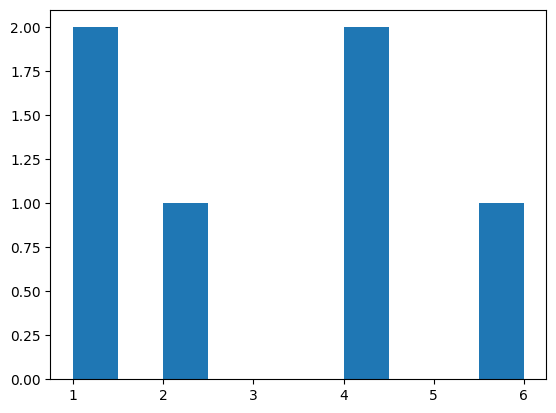

In [ ]:
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize

words= word_tokenize('This is a pretty cool!')

word_lengths =[len(w) for w in words]
plt.hist(word_lengths)

(array([4., 1., 1., 4., 3., 6., 1., 1., 1., 2.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

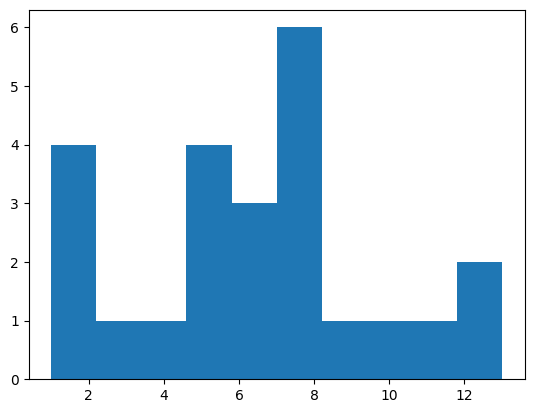

In [ ]:
from nltk.tokenize import word_tokenize

text='Design and develop machine vision system based on project requirements with software programming language or logic based configuration by utilizing image processing library.'
words= word_tokenize(text)

word_length = [len(w) for w in words]

plt.hist(word_length)

In [ ]:
from collections import Counter

Counter(word_tokenize('Design and develop machine vision system based on system machine  project requirements'))



Counter({'Design': 1,
         'and': 1,
         'develop': 1,
         'machine': 2,
         'vision': 1,
         'system': 2,
         'based': 1,
         'on': 1,
         'project': 1,
         'requirements': 1})

In [ ]:
Counter.most_common(1)

AttributeError: 'int' object has no attribute 'items'

In [ ]:
#index_col='Month' sets the 'Month' column as the index of the DataFrame, meaning that the DataFrame will be indexed by the values in the 'Month' column.

df=pd.read_csv('/content/DL1-monthly-milk-production.csv',index_col='Month')
df.head(10)

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
1962-06-01 01:00:00,697.0
1962-07-01 01:00:00,640.0
1962-08-01 01:00:00,599.0
1962-09-01 01:00:00,568.0


In [ ]:
df.tail()

,Milk Production
Month,
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0
1975-11-01 01:00:00,797.0
1975-12-01 01:00:00,843.0


In [ ]:
#convert index in datetime

df.index=pd.to_datetime(df.index)

<Axes: xlabel='Month'>

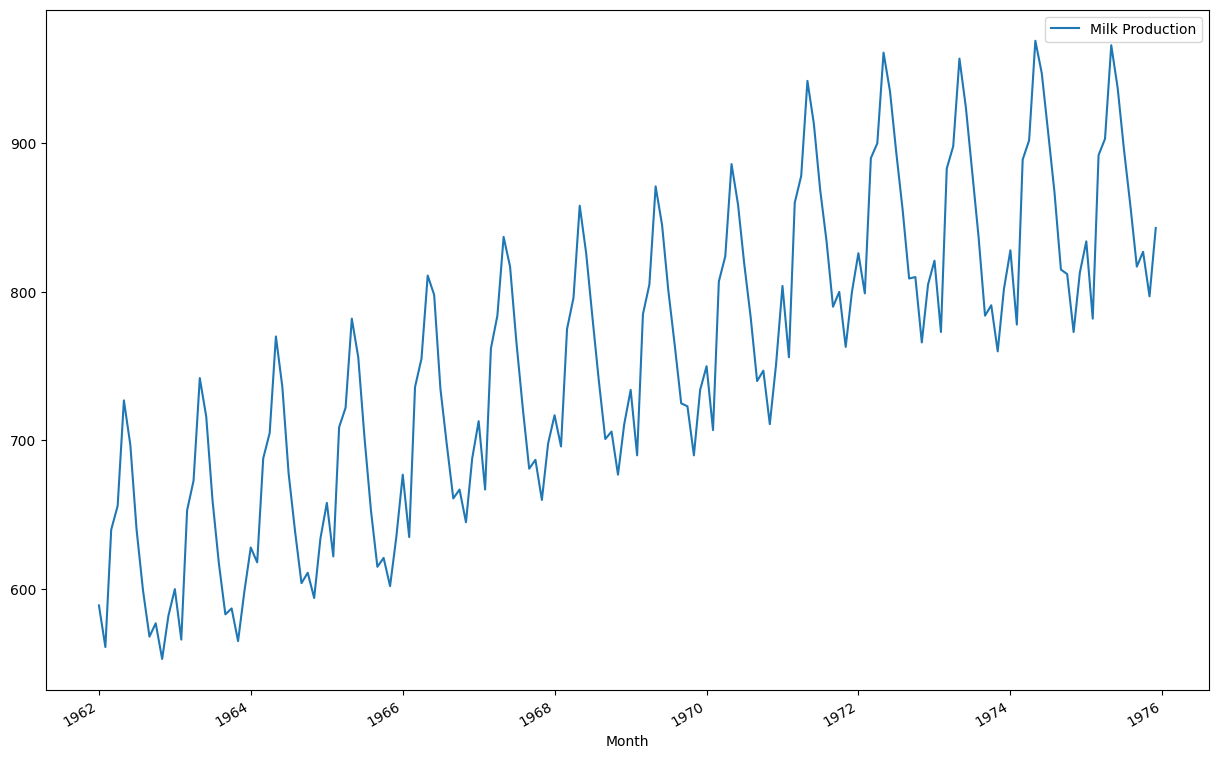

In [ ]:

df.plot(figsize=(15,10))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

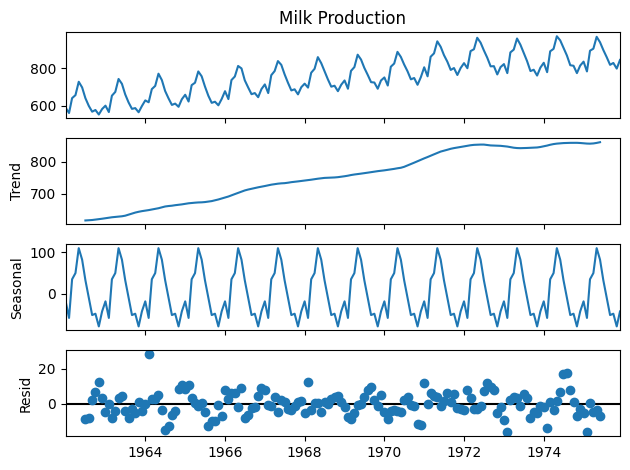

In [ ]:
results = seasonal_decompose(df['Milk Production'])
results.plot();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Milk Production  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [ ]:
len(df)

168

In [ ]:
df.isnull().sum()

Milk Production    0
dtype: int64

In [ ]:
#1.split data into training and testing set (training data= 13 years, testing data = 1year)
train_set= df.head(156)
test_set=df.tail(12)

In [ ]:
train_set

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0


In [ ]:
#2. Feature scaling convert 0 to 1, din wan module get confused

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scale_train=scaler.fit_transform(train_set)

scale_test=scaler.transform(test_set)

In [ ]:
scale_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# DEFINE GENERATOR
#just one feature, the time-series
# batch_size is set to 1, meaning each batch will contain one sample
num_inputs = 3

num_features=1

generator= TimeseriesGenerator(scale_train,scale_train,length=num_inputs,batch_size=1)

In [ ]:
# number of items in the scale_train object, while len(generator) returns the number of batches generated by the generator object.
print(len(scale_train),len(generator))

156 153


In [ ]:
X,y=generator[0]
print(f'Given the array:\n{X.flatten()}')
print(f'Predict the y:\n{y}')

Given the array:
[0.08653846 0.01923077 0.20913462]
Predict the y:
[[0.24759615]]


In [ ]:
X,y=generator[1]
print(f'Given the array:\n{X.flatten()}')
print(f'Predict the y:\n{y}')

Given the array:
[0.01923077 0.20913462 0.24759615]
Predict the y:
[[0.41826923]]


In [ ]:
X,y=generator[2]
print(f'Given the array:\n{X.flatten()}')
print(f'Predict the y:\n{y}')

Given the array:
[0.20913462 0.24759615 0.41826923]
Predict the y:
[[0.34615385]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
num_inputs = 12

num_features=1

generator= TimeseriesGenerator(scale_train,scale_train,length=num_inputs,batch_size=1)

In [ ]:
X,y=generator[0]
print(f'Given the array:\n{X.flatten()}')
print(f'Predict the y:\n{y}')

Given the array:
[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]
Predict the y:
[[0.11298077]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#define the model
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(num_inputs,num_features)))
model.add(Dense(1))


In [ ]:
model.compile(optimizer="adam",loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit the model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 3s 10ms/step - loss: 0.0466
Epoch 2/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0218
Epoch 3/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0185
Epoch 4/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0123
Epoch 5/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 6/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0189
Epoch 7/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0156
Epoch 8/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0096
Epoch 9/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0060
Epoch 10/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0058
Epoch 11/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0059
Epoch 12/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0048
Epoch 13/50
1

In [ ]:
model.history

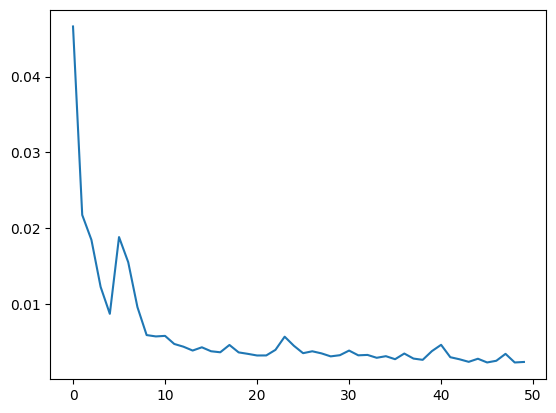

In [ ]:
loss_per_epoch= model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)


In [ ]:
len(loss_per_epoch)

50


The code retrieves the loss values recorded during the training of a deep learning model and then creates a plot to visualize how the loss changes over each epoch (or training iteration).

Here's a breakdown in layman's terms:

model.history.history['loss']: This part of the code accesses the history of the model's training process and extracts the loss values recorded during each epoch. The loss indicates how well the model is performing – lower loss values generally mean the model is doing better at its task.

plt.plot(range(len(loss_per_epoch)), loss_per_epoch): This part plots the loss values against the number of epochs. The x-axis represents the epochs, while the y-axis represents the corresponding loss values. By plotting this, you can see how the loss changes over time during the training process. The goal is usually to see the loss decrease over epochs, indicating that the model is improving its performance.

In [ ]:
#selects the last 12 elements from the list or array scale_train and assigns them to the variable last_train_batch.

last_train_batch=scale_train[-12:]

In [ ]:
last_train_batch=last_train_batch.reshape((1,num_inputs,num_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 352ms/step


array([[0.6312476]], dtype=float32)

In [ ]:
scale_test[0]

array([0.67548077])

In [ ]:
last_train_batch.shape

(1, 12, 1)

In [ ]:
scale_train[1]

array([0.01923077])

In [ ]:
test_prediction = []  # Initialize an empty list to store predictions

# Assuming 'scale_train', 'num_inputs', and 'num_features' are defined elsewhere in your code

# Extract the last 'num_inputs' elements from the training data
first_eval_batch = scale_train[-num_inputs:]

# Reshape the first evaluation batch to fit the model input shape
current_batch = first_eval_batch.reshape((1, num_inputs, num_features))

# Assuming 'test' is intended to be a sequence of data for prediction
for i in range(len(test_set)):

    # Get the prediction value for the current batch
    current_pred = model.predict(current_batch)[0]

    # Append the prediction to the array
    test_prediction.append(current_pred)

    # Use the prediction to update the batch and remove the first values
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)




1/1 [==============================] - 0s 23ms/step


In [ ]:
test_prediction

[array([0.6312476], dtype=float32),
 array([0.63351226], dtype=float32),
 array([0.8002965], dtype=float32),
 array([0.87035114], dtype=float32),
 array([0.9469113], dtype=float32),
 array([0.93457156], dtype=float32),
 array([0.8757098], dtype=float32),
 array([0.77833575], dtype=float32),
 array([0.6702416], dtype=float32),
 array([0.6199469], dtype=float32),
 array([0.5715452], dtype=float32),
 array([0.5938557], dtype=float32)]

In [ ]:
test_set.head()

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0


In [ ]:
true_prediction=scaler.inverse_transform(test_prediction)

In [ ]:
test_set['Prediction']=true_prediction

<ipython-input-81-956287cfde90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Prediction']=true_prediction


<Axes: xlabel='Month'>

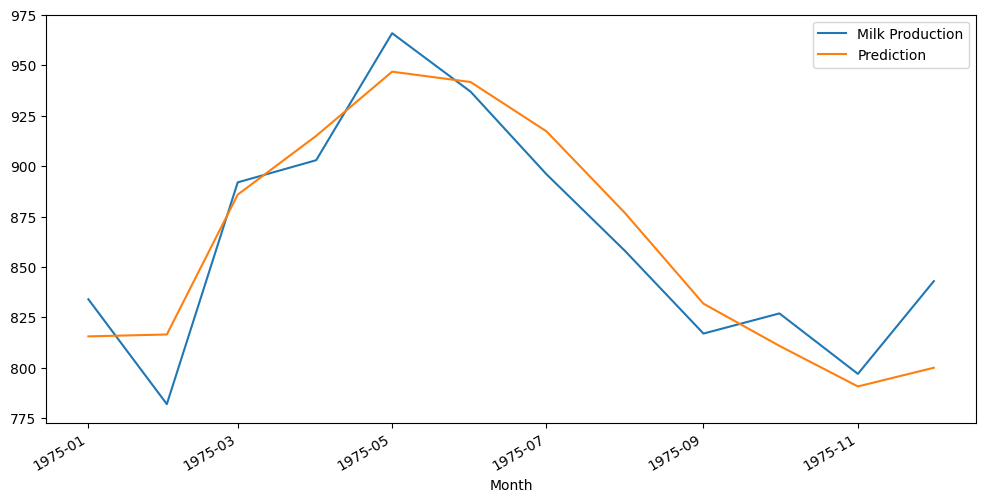

In [ ]:







































test_set.plot(figsize=(12,6))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse =sqrt(mean_squared_error(test_set['Milk Production'],test_set['Prediction']))
print(rmse)


20.957920312219798
